<a href="https://colab.research.google.com/github/quangduong191/BTAI/blob/main/NHANDIENKHUONMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Mask/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 10040 images belonging to 2 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Mask/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 992 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [ ]:
validation.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=5,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/5
314/314 [==============================] - 1537s 5s/step - loss: 0.0431 - accuracy: 0.9851 - val_loss: 0.0543 - val_accuracy: 0.9788
Epoch 2/5
314/314 [==============================] - 1501s 5s/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0461 - val_accuracy: 0.9839
Epoch 3/5
314/314 [==============================] - 1503s 5s/step - loss: 0.0256 - accuracy: 0.9909 - val_loss: 0.0552 - val_accuracy: 0.9829
Epoch 4/5
314/314 [==============================] - 1495s 5s/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0202 - val_accuracy: 0.9889
Epoch 5/5
314/314 [==============================] - 1502s 5s/step - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0310 - val_accuracy: 0.9859


In [ ]:
model.save("/content/drive/MyDrive/Mask/nhandien.h5")

<function matplotlib.pyplot.show>

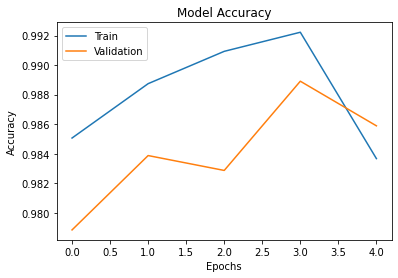

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model_CNN=load_model('/content/drive/MyDrive/Mask/nhandien.h5')

In [ ]:
classes=['Deo_khau_trang','Khong_deo_khau_trang']

'Deo_khau_trang'

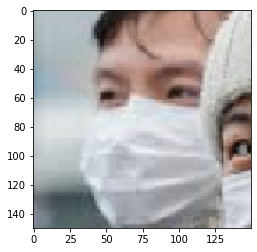

In [ ]:
img = load_img('/content/drive/MyDrive/Mask/Test/WithMask/408.png',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Deo_khau_trang'

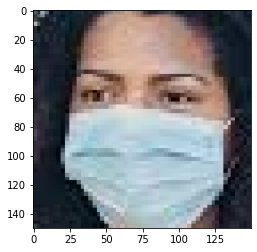

In [ ]:
img = load_img('/content/drive/MyDrive/Mask/Train/WithMask/1811.png',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Khong_deo_khau_trang'

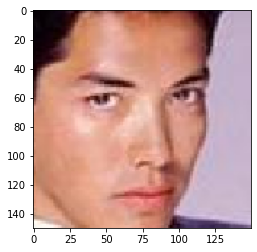

In [ ]:
img = load_img('/content/drive/MyDrive/Mask/Train/WithoutMask/1186.png',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]